In [68]:
import torch as tr
import torchvision as tv
import pandas as pd
import numpy as np
import scipy as scp
import datetime as dt
from torchvision.transforms import v2
import cv2

from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import pyplot as plt
import seaborn as sns

import os

In [69]:
!tree -L 2

.
├── lab_1.ipynb
├── lab_2.ipynb
├── lab_3.ipynb
├── lab_4.ipynb
├── lab_5_data
│   ├── plates
│   └── sample_submission.csv
├── lab_5.ipynb
└── README.md

2 directories, 7 files


In [70]:
os.listdir("./lab_5_data/plates/train")

['dirty', 'cleaned']

In [71]:
data_root = "./lab_5_data/plates/"
train_dir = os.path.join(data_root, "train")

train_dirty_dir = os.path.join(train_dir, "dirty")
train_cleaned_dir = os.path.join(train_dir, "cleaned")

test_dir = os.path.join(data_root, "test")
# os.listdir(data_root)
# os.listdir(train_dir)
# os.listdir(train_dirty_dir)
# os.listdir(train_cleaned_dir)
# os.listdir(test_dir)

(256, 341, 3)
torch.Size([256, 341, 3])


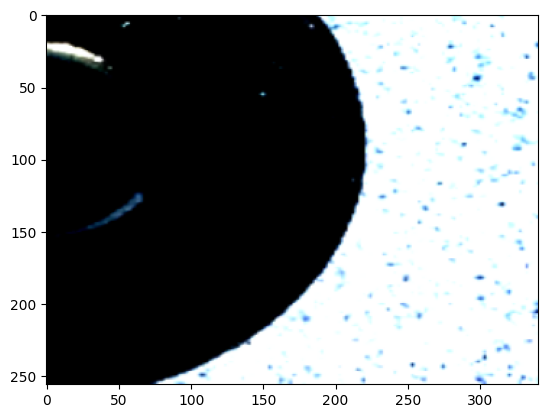

In [330]:
img = cv2.imread(
    os.path.join(
        train_dirty_dir, os.listdir(train_dirty_dir)[0]
    ))
print(img.shape)
transforms_t = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(tr.float32, scale=True),
    v2.RandomResizedCrop(224),
    v2.RandomHorizontalFlip(),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    v2.Lambda( lambda pic: tr.clip(pic,0,1) ),
    v2.Resize(size=(256, 341)),
])

tmp = transforms_t(img).permute(1,2,0)
print(tmp.shape)
plt.imshow(tmp)

In [341]:
transforms = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(tr.float32, scale=True),
    v2.RandomResizedCrop(224),
    v2.RandomHorizontalFlip(),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    v2.Lambda( lambda pic: tr.clip(pic,0,1) ),
    v2.Resize(size=(256,341)),
])

transforms1 = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(tr.float32, scale=True),
    v2.ColorJitter(brightness=.5, hue=.3),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    v2.Lambda( lambda pic: tr.clip(pic,0,1) ),
    v2.Resize(size=(256,341)),
])
transforms2 = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(tr.float32, scale=True),
    v2.RandomHorizontalFlip(),
    v2.ColorJitter(brightness=.2, hue=.4),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    v2.Lambda( lambda pic: tr.clip(pic,0,1) ),
    v2.Resize(size=(256,341)),
])

transforms3 = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(tr.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    v2.Lambda( lambda pic: tr.clip(pic,0,1) ),
    v2.Resize(size=(256,341)),
])


from PIL import Image


os.makedirs("extra/dirty")
os.makedirs("extra/cleaned")

for ind, img_path in enumerate(os.listdir(train_cleaned_dir)):
    img = Image.open(
        os.path.join(
            train_cleaned_dir, img_path
        ))
    tr_img = transforms(img)
    tv.utils.save_image(tr_img, f"extra/cleaned/011100{ind+0}.jpg")


for ind, img_path in enumerate(os.listdir(train_cleaned_dir)):
    img = Image.open(
        os.path.join(
            train_cleaned_dir, img_path
        ))
    tr_img = transforms1(img)
    tv.utils.save_image(tr_img, f"extra/cleaned/00{ind+100}.jpg")
    
for ind, img_path in enumerate(os.listdir(train_cleaned_dir)):
    img = Image.open(
        os.path.join(
            train_cleaned_dir, img_path
        ))
    tr_img = transforms2(img)
    tv.utils.save_image(tr_img, f"extra/cleaned/00{ind+200}.jpg")
    
for ind, img_path in enumerate(os.listdir(train_cleaned_dir)):
    img = Image.open(
        os.path.join(
            train_cleaned_dir, img_path
        ))
    tr_img = transforms3(img)
    tv.utils.save_image(tr_img, f"extra/cleaned/00{ind+300}.jpg")


###dirty 
for ind, img_path in enumerate(os.listdir(train_dirty_dir)):
    img = Image.open(
        os.path.join(
            train_dirty_dir, img_path
        ))
    tr_img = transforms(img)
    tv.utils.save_image(tr_img, f"extra/dirty/11100{ind}.jpg")


for ind, img_path in enumerate(os.listdir(train_dirty_dir)):
    img = Image.open(
        os.path.join(
            train_dirty_dir, img_path
        ))
    tr_img = transforms1(img)
    tv.utils.save_image(tr_img, f"extra/dirty/00{ind+100}.jpg")
    
for ind, img_path in enumerate(os.listdir(train_dirty_dir)):
    img = Image.open(
        os.path.join(
            train_dirty_dir, img_path
        ))
    tr_img = transforms2(img)
    tv.utils.save_image(tr_img, f"extra/dirty/00{ind+200}.jpg")
    
for ind, img_path in enumerate(os.listdir(train_dirty_dir)):
    img = Image.open(
        os.path.join(
            train_dirty_dir, img_path
        ))
    tr_img = transforms3(img)
    tv.utils.save_image(tr_img, f"extra/dirty/00{ind+300}.jpg")

In [339]:
# ! rm -rf extra

In [342]:
! mv extra/cleaned/* lab_5_data/plates/train/cleaned
! mv extra/dirty/* lab_5_data/plates/train/dirty